## 多分类问题中的混淆矩阵

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=666)

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9408901251738526

In [17]:
y_predict = log_reg.predict(X_test)

In [18]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)
# sklearn中precision_score默认是解决二分类问题。修改average参数可以对应解决多分类问题

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [7]:
precision_score(y_test, y_predict, average="micro")

0.9408901251738526

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)
# 混淆矩阵天生支持多分类问题
# 行方向是真值，列方向是预测值

array([[148,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0, 125,   2,   0,   0,   0,   0,   3,   2,  11],
       [  0,   1, 134,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   1, 138,   0,   5,   0,   1,   4,   0],
       [  2,   4,   0,   0, 138,   0,   1,   3,   0,   2],
       [  1,   2,   1,   0,   0, 146,   1,   0,   0,   1],
       [  0,   2,   0,   0,   0,   1, 132,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 135,   0,   1],
       [  0,   8,   2,   1,   3,   3,   0,   1, 120,   2],
       [  0,   1,   0,   6,   0,   1,   0,   1,   1, 137]], dtype=int64)

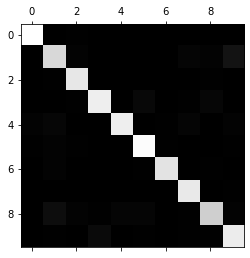

In [9]:
# 绘制混淆矩阵的方法，matshow是用来绘制matric show
# cm就是color map，和颜色对应的映射
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

[[0.         0.         0.00735294 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.01470588 0.         0.         0.
  0.         0.02205882 0.01428571 0.07482993]
 [0.         0.00699301 0.         0.         0.         0.
  0.         0.         0.00714286 0.        ]
 [0.         0.         0.00735294 0.         0.         0.03289474
  0.         0.00735294 0.02857143 0.        ]
 [0.01342282 0.02797203 0.         0.         0.         0.
  0.00735294 0.02205882 0.         0.01360544]
 [0.00671141 0.01398601 0.00735294 0.         0.         0.
  0.00735294 0.         0.         0.00680272]
 [0.         0.01398601 0.         0.         0.         0.00657895
  0.         0.         0.00714286 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.00680272]
 [0.         0.05594406 0.01470588 0.00671141 0.02       0.01973684
  0.         0.00735294 0.         0.01360544]
 [0.         

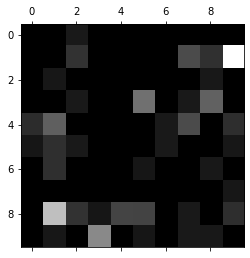

In [19]:
# 计算每一行有多少样本。求出的是每一行的和
row_sums = np.sum(cfm, axis=1)
# 每一行的数字除以该行数字和
err_matrix = cfm / row_sums
# 对角线数字都填成0，直接不关注了
np.fill_diagonal(err_matrix, 0)

print(err_matrix)

plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()